In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
bias = []
for i in range(1,11):
    bias.append(fits.getdata("bias-"+"0"*(4-len(str(i)))+str(i)+".fit", 
                             ext=0).astype(np.int))
    
flat149 = []
for i in range(1,11):
    flat149.append(fits.getdata("Light_149-"+"0"*(4-len(str(i)))+str(i)
                                +".fit", ext=0).astype(np.int))
    
flat181 = []
for i in range(1,11):
    flat181.append(fits.getdata("Light_181-"+"0"*(4-len(str(i)))+str(i)
                                +".fit", ext=0).astype(np.int))
    
flat255 = []
for i in range(1,11):
    flat255.append(fits.getdata("Light_255-"+"0"*(4-len(str(i)))+str(i)
                                +".fit", ext=0).astype(np.int))
#Loading in all files pertaining to Part 1

[ 53875.53844496  71559.75414591 106635.10612405]
[27723.91075185 38644.94391939 54922.64922255]


<function matplotlib.pyplot.show(*args, **kw)>

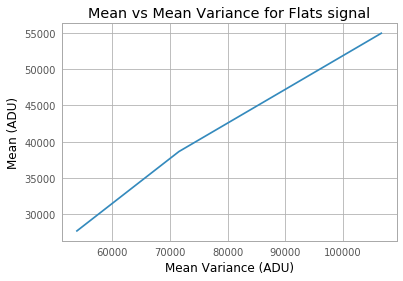

In [37]:
avgbias = sum(bias)/10 
#Stacking the 10 bias frames onto one other to reduce the error 
#in the bias
newflat149 = flat149-avgbias  
#Subtracting the bias frames from the flat frames
newflat181 = flat181-avgbias
newflat255 = flat255-avgbias

meanvar149 = np.mean(newflat149.var(axis = 0))  
#Obtaining the variance of the flats per pixel across each of the 
#10 flats, then averaging all of the pixels to obtain a single value
meanvar181 = np.mean(newflat181.var(axis = 0))  
meanvar255 = np.mean(newflat255.var(axis = 0))

meana = np.mean(newflat149)  
#Obtaining the mean value for every pixel in the flats
meanb = np.mean(newflat181)
meanc = np.mean(newflat255)
y = np.array([meana, meanb, meanc])  #Putting data into arrays
x = np.array([meanvar149, meanvar181, meanvar255])
print(x)
print(y)
plt.plot(x,y) #Plotting the Mean value vs. Variance for the flats
plt.title("Mean vs Mean Variance for Flats signal")
plt.xlabel("Mean Variance (ADU)")
plt.ylabel("Mean (ADU)")
plt.show

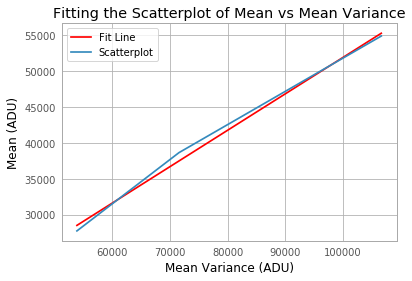

m=0.5082693281227528, b=1112.4127539274004
Slope = Gain = 0.5082693281227528 e-/ADU
Error in the Y-intercept = 3064.3127652798817


In [40]:
from scipy.optimize import curve_fit 

def func (x,m,b): #Defining the function for a linear plot (Y=mX+b) 
    #Where m is the slope and b is the y intercept
    return m*x+b

coeffs, fiterr = curve_fit(func, x, y)  #Curve fit function
plt.plot(x ,func(x,*coeffs),'r', label='Fit Line')  #Plotting the fit
plt.plot(x,y, label='Scatterplot')  
#Replotting the mean vs. the variance for the flats
plt.legend()
plt.title("Fitting the Scatterplot of Mean vs Mean Variance")
plt.xlabel("Mean Variance (ADU)")
plt.ylabel("Mean (ADU)")
plt.show()

print ("m=%s, b=%s" % (coeffs[0], coeffs[1]))  
#Displaying the slope and y intercept
print("Slope = Gain = %s e-/ADU" % (coeffs[0]))
print("Error in the Y-intercept = %s" % ((fiterr[1,1])**(1/2)))
#Displaying the error calculated by the curve fit function
# to show how the y intercept does not cannot correctly 
#represent the readnoise because our fit only has 3 points


In [8]:
dark = []
dark.append(fits.getdata("DarkT6exp600-0001.fit", ext=0).astype(np.int))
dark.append(fits.getdata("DarkT9exp600-0001.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupAADark_Day_2_6cexp900-0001.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupAADark_Day_2_9cexp300-0001.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupADarkT4.6Exp450.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupADarkT8.9Exp300.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupBBDarkT7Exp400.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupBBDarkT8Exp400.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupBDarkT6Exp300.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupBDarkT9Exp600.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupCDarkT7.1Exp400.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupCDarkT9.4Exp300.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupDDarkT7Exp600.fit", ext=0).astype(np.int))
dark.append(fits.getdata("GroupDDarkT9.4Exp300.fit", ext=0).astype(np.int))
bias2 = []
for i in range(1,51):
    bias2.append(fits.getdata("BiasWeek2-"+"0"*(4-len(str(i)))+str(i)
                              +".fit", ext=0).astype(np.int))
    
#Loading all the data pertaining to Part 2

<function matplotlib.pyplot.show(*args, **kw)>

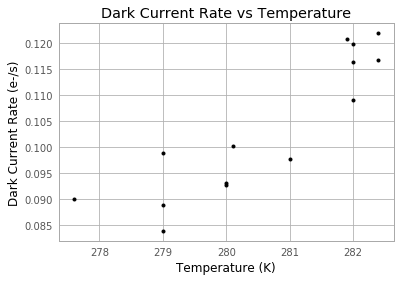

In [42]:
avgbias2 = sum(bias2)/50 
#Stacking the 50 bias frames onto one other to reduce the 
#error in the bias
newdark=dark-avgbias2  
#Multiplying Dark frames by gain and subtracting the 
#bias frames from the Dark Frames
meandark = [np.median(newdark[0]),np.median(newdark[1]),
            np.median(newdark[2]),np.median(newdark[3]),
            np.median(newdark[4]),np.median(newdark[5]),
            np.median(newdark[6]),np.median(newdark[7]),
            np.median(newdark[8]),np.median(newdark[9]),
            np.median(newdark[10]),np.median(newdark[11]),
            np.median(newdark[12]),np.median(newdark[13])]
#Creating an array that contains the median values for each dark frame
exposuret = [600,600,900,300,450,300,400,400,300,600,400,300,600,300] 
#Creating an array for the cooresponding exposure times
dark2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Creating a temporary array for what will be the dark current 
#rates at each temperature
for i in range(0,14): 
    dark2[i]=meandark[i]/exposuret[i]  
    #Dividing the means by their respective exposure times
y = [dark2[4]*.5,dark2[0]*.5,dark2[2]*.5,dark2[8]*.5,dark2[6]*.5,
     dark2[12]*.5,dark2[10]*.5,dark2[7]*.5,dark2[5]*.5,dark2[1]*.5,
     dark2[3]*.5,dark2[9]*.5,dark2[11]*.5,dark2[13]*.5]
#Rearranging the data to go in order and also multiplying by gain
x=np.array([4.6,6,6,6,7,7,7.1,8,8.9,9,9,9,9.4,9.4])+273 
#Creating an ordered array of the temps converted to Kelvin
plt.plot(x,y,'k.') #Plotting the Dark Current Rate vs. Temperature
plt.title("Dark Current Rate vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Dark Current Rate (e-/s)")
plt.show


A=12568.84871552738, E=0.9752820119457787


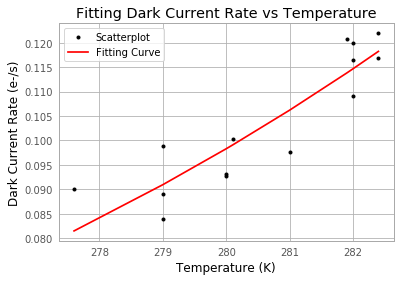

In [43]:
from scipy.optimize import curve_fit 

def func (x,A,E): 
    #Defining function for dark current 
    #(x = temperature A = Constant, E = Difference between the band
    #gap energy for the semi-conductor)
    return A*x**(3/2)*np.exp(-E/(2*8.617*10**-5*x))

a0,e0 = (1,1) #Initial guess coefficients
coeffs, fiterr = curve_fit(func, x, y, p0=(a0, e0))  
#Curve fitting function

print ("A=%s, E=%s" % (coeffs[0], coeffs[1]))  
#Displaying the coefficients
plt.plot(x,y, 'k.', label="Scatterplot")  
#Replotting dark current rate vs. Temperature
plt.plot(x,(func(x,*coeffs)),'r-', label="Fitting Curve")  
#Plotting fit curve
plt.title("Fitting Dark Current Rate vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Dark Current Rate (e-/s)")
plt.legend()
plt.show()